<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Instructions:

In this Assignment, you will demonstrate the data regression skills you have learned by completing this course. You are expected to leverage a wide variety of tools, but also this report should focus on present findings, insights, and next steps. You may include some visuals from your code output, but this report is intended as a summary of your findings, not as a code review. 

The grading will center around 5 main points:

1. Does the report include a section describing the data?
2. Does the report include a paragraph detailing the main objective(s) of this analysis? 
3. Does the report include a section with variations of linear regression models and specifies which one is the model that best suits the main objective(s) of this analysis.
4. Does the report include a clear and well-presented section with key findings related to the main objective(s) of the analysis?
5. Does the report highlight possible flaws in the model and a plan of action to revisit this analysis with additional data or different predictive modeling techniques? 




## Import the required libraries


The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or Ananconda) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [106]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [107]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None)

## Importing the Dataset


Before you begin, you will need to choose a data set that you feel passionate about. You can brainstorm with your peers about great public data sets using the discussion board in this module.


Read your chosen dataset into pandas dataframe:


In [108]:
current_directory = os.getcwd()
data = pd.read_csv(current_directory + '/housing.csv')
data_copy = data.copy()
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Once you have selected a data set, you will produce the deliverables listed below and submit them to one of your peers for review. Treat this exercise as an opportunity to produce analysis that are ready to highlight your analytical skills for a senior audience, for example, the Chief Data Officer, or the Head of Analytics at your company.
Sections required in your report:

*   Main objective of the analysis that specifies whether your model will be focused on prediction or interpretation.
*   Brief description of the data set you chose and a summary of its attributes.
*   Brief summary of data exploration and actions taken for data cleaning and feature engineering.
*   Summary of training at least three linear regression models which should be variations that cover using a simple  linear regression as a baseline, adding polynomial effects, and using a regularization regression. Preferably, all use the same training and test splits, or the same cross-validation method.
*  A paragraph explaining which of your regressions you recommend as a final model that best fits your needs in terms of accuracy and explainability.
*  Summary Key Findings and Insights, which walks your reader through the main drivers of your model and insights from your data derived from your linear regression model.
*  Suggestions for next steps in analyzing this data, which may include suggesting revisiting this model adding specific data features to achieve a better explanation or a better prediction.


# 1. About the Data


This is the dataset used in the second chapter of Aurélien Géron's recent book 'Hands-On Machine learning with Scikit-Learn and TensorFlow'. 
It serves as an excellent introduction to implementing machine learning algorithms because it requires rudimentary data cleaning, has an easily 
understandable list of variables and sits at an optimal size between being to toyish and too cumbersome.

The data contains information from the 1990 California census. So although it may not help you with predicting current housing prices like the 
Zillow Zestimate dataset, it does provide an accessible introductory dataset for teaching people about the basics of machine learning.

## Contents

The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. Be warned the data aren't cleaned so there are some preprocessing steps required! The columns are as follows, their names are pretty self explanitory:


* longitude: A measure of how far west a house is; a higher value is farther west
* latitude: A measure of how far north a house is; a higher value is farther north
* housingMedianAge: Median age of a house within a block; a lower number is a newer building
* totalRooms: Total number of rooms within a block
* totalBedrooms: Total number of bedrooms within a block
* population: Total number of people residing within a block
* households: Total number of households, a group of people residing within a home unit, for a block
* medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)
* medianHouseValue: Median house value for households within a block (measured in US Dollars)
* oceanProximity: Location of the house w.r.t ocean/sea

In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [110]:
# for null values in total bedroom, I would replace with the mode
print(data['total_bedrooms'].value_counts())
mode = data['total_bedrooms'].mode()
mode


280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
2961.0     1
1915.0     1
1215.0     1
3298.0     1
1052.0     1
Name: total_bedrooms, Length: 1923, dtype: int64


0    280.0
Name: total_bedrooms, dtype: float64

In [111]:

data['total_bedrooms'].fillna(data['total_bedrooms'].mode()[0], inplace=True)


In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [113]:
#Feature Engineering

#Create column that describes the average population per household
data['household_size'] = data.population / data.households

#Create column that describes the proportion of bedrooms out of total rooms
data['bedroom_prop'] = data.total_bedrooms / data.total_rooms

{'whiskers': [<matplotlib.lines.Line2D at 0x24b47c64e50>,
 'caps': [<matplotlib.lines.Line2D at 0x24b4aeb8090>,
 'boxes': [<matplotlib.lines.Line2D at 0x24b47d57790>],
 'medians': [<matplotlib.lines.Line2D at 0x24b47c99590>],
 'fliers': [<matplotlib.lines.Line2D at 0x24b47c943d0>],
 'means': []}

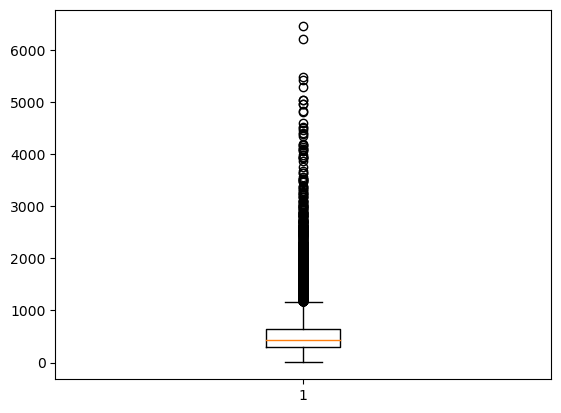

In [114]:
plt.boxplot(data['total_bedrooms'])

In [115]:
column_name = 'total_bedrooms'

# Calculate the first and third quartiles
Q1 = data[column_name].quantile(0.25)
Q3 = data[column_name].quantile(0.75)

# Calculate the interquartile range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the number of outliers
outliers_count = ((data[column_name] < lower_bound) | (data[column_name] > upper_bound)).sum()

print(f'The number of outliers in {column_name} is: {outliers_count}')

The number of outliers in total_bedrooms is: 1279


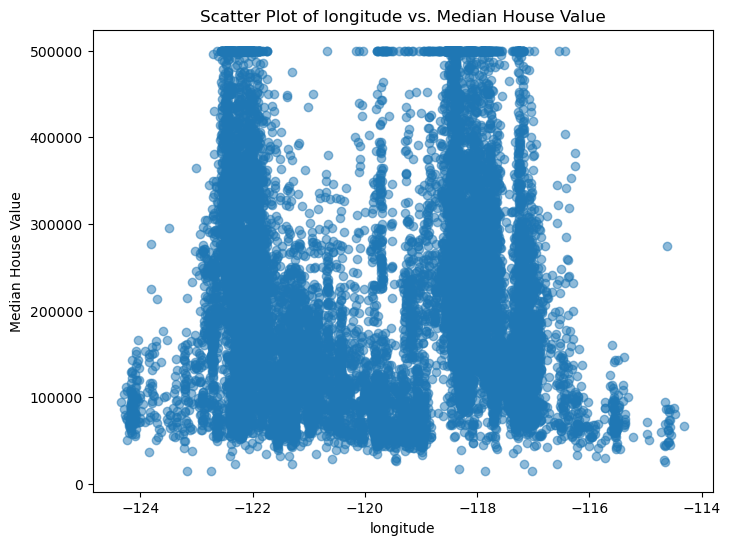

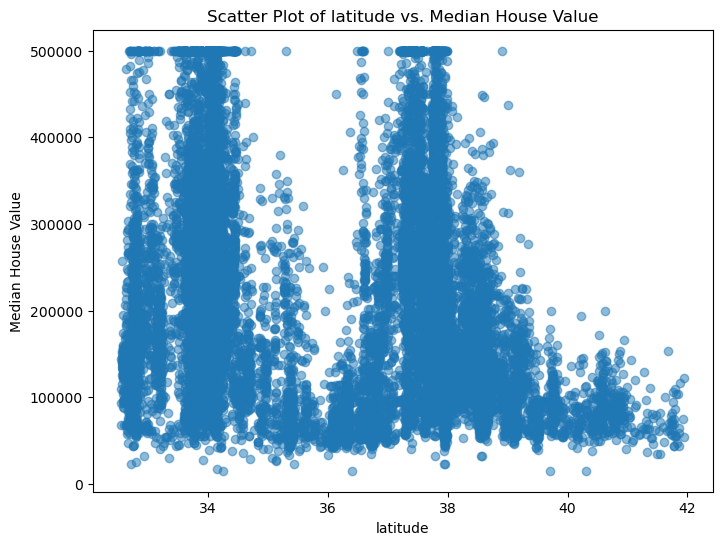

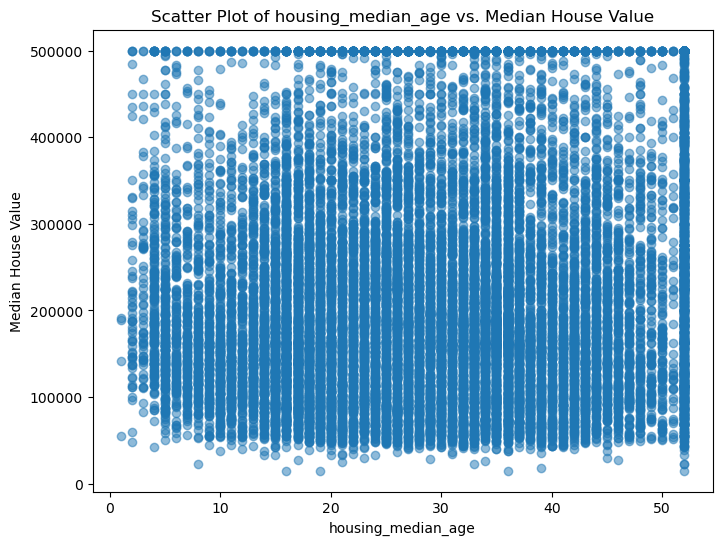

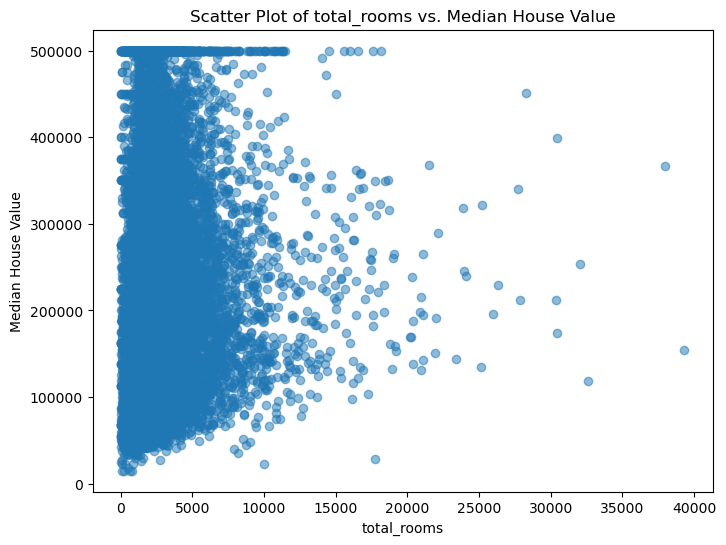

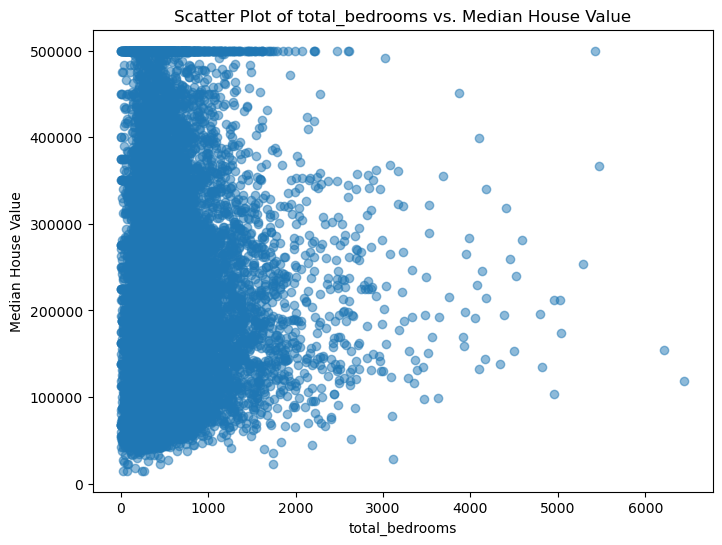

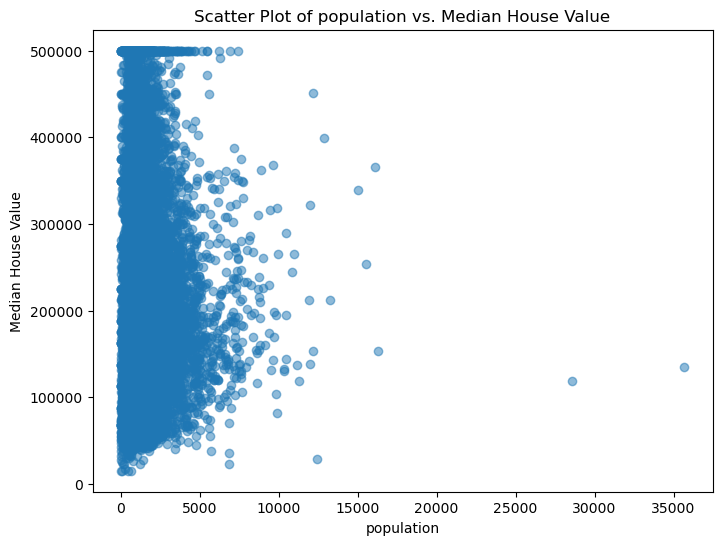

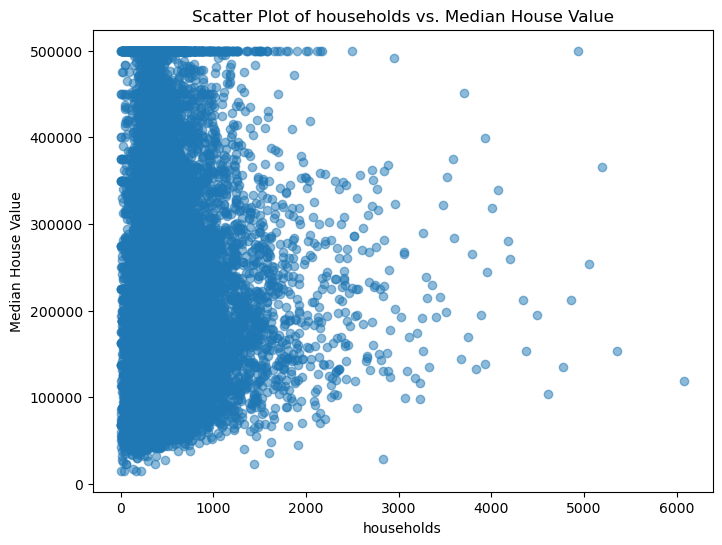

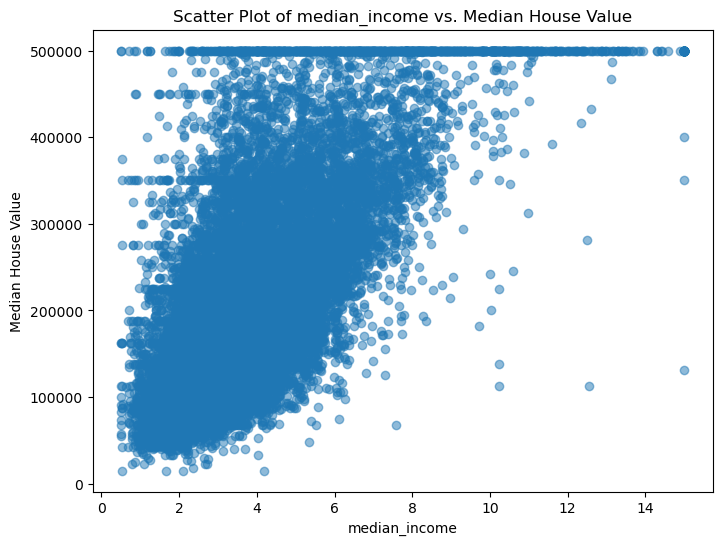

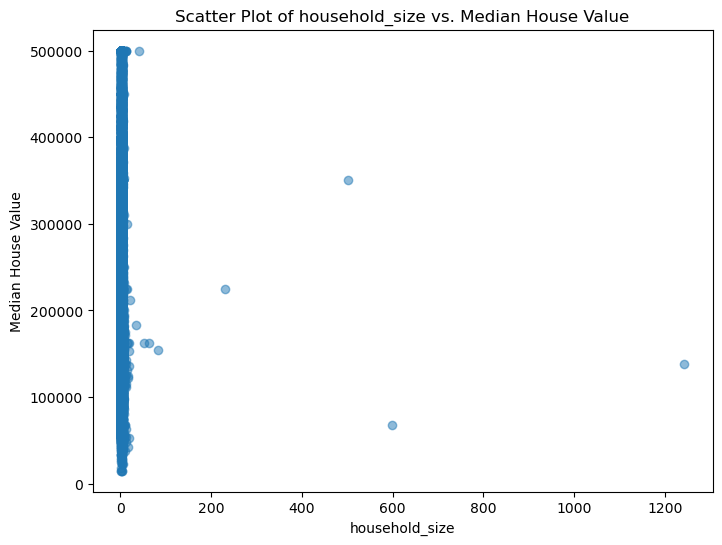

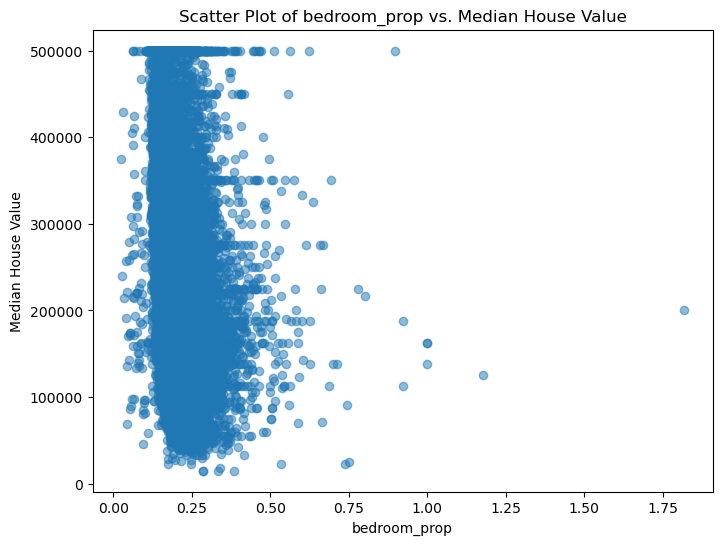

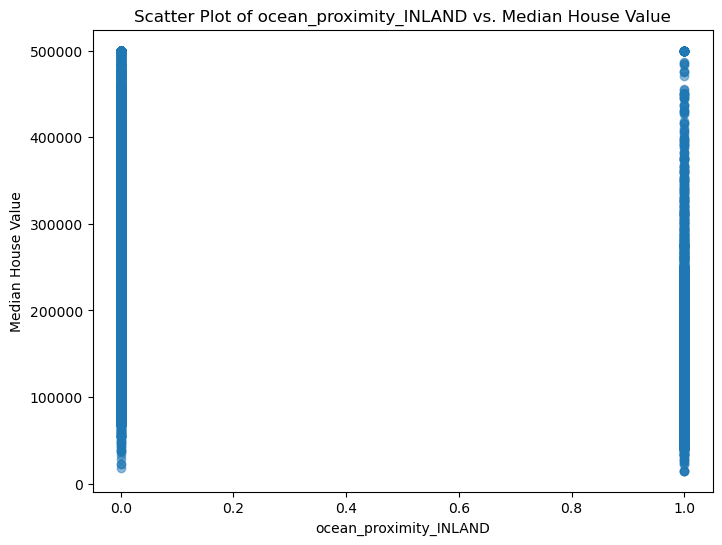

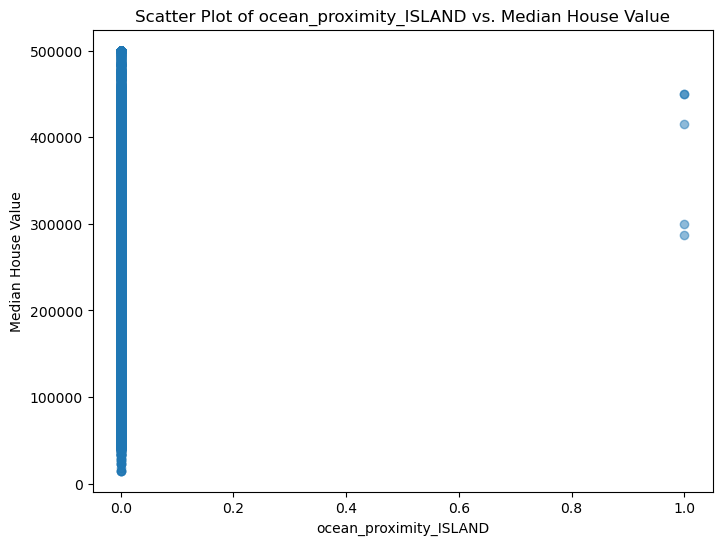

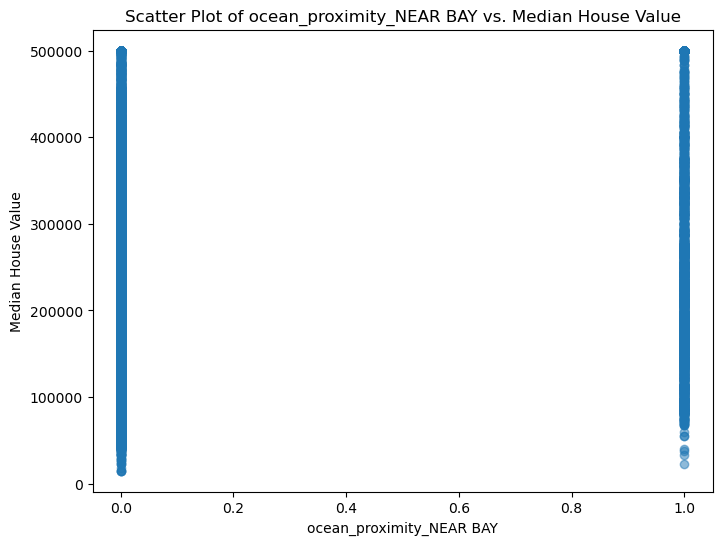

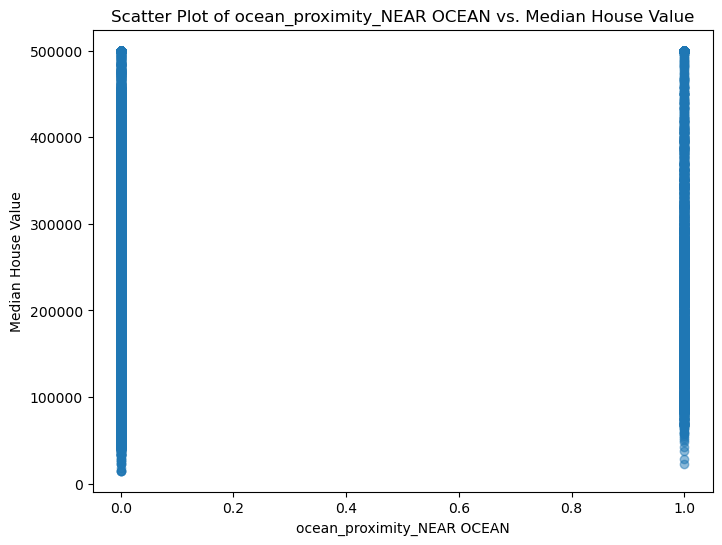

In [135]:
features = data.columns.drop('median_house_value', 'ocean_proximity')

# Create scatter plots for each feature against the target variable
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(data[feature], data['median_house_value'], alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs. Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.show()

In [117]:
# Resolving categorical variables:
data['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [118]:
from sklearn.preprocessing import OneHotEncoder

# Assuming you have a DataFrame 'data' and a list of categorical columns
categorical_columns = ['ocean_proximity']

# Create a new DataFrame with one-hot encoded columns
data = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

data.shape


(20640, 15)

# 2. Objectives


#### Data Exploration:
* Load the dataset into a suitable environment (such as Python with Pandas).

* Display the first few rows of the dataset to get a sense of the data.

#### Data Cleaning:
* Check for missing values in the dataset and decide on an appropriate strategy for handling them.
* Explore the summary statistics to identify any anomalies or outliers that may need to be addressed.

#### Exploratory Data Analysis (EDA):
* Generate descriptive statistics for numerical columns (mean, median, standard deviation, etc.).
* Visualize the geographical distribution of houses using longitude and latitude.
* Create histograms or box plots for relevant numerical columns to understand their distributions.

#### Feature Engineering:
* Consider creating new features based on existing ones if it makes sense for your analysis.
* Convert categorical variables (e.g., 'ocean_proximity') into numerical representations if needed.

#### Correlation Analysis:
* Explore the correlation between different features and the target variable ('median_house_value').
* Visualize the correlations using a heatmap.

#### Data Visualization:
* Create scatter plots to visualize relationships between variables, especially between 'median_income' and 'median_house_value.'

#### Machine Learning:
* Split the data into training and testing sets.
* Choose a machine learning algorithm (e.g., linear regression) and train a model to predict 'median_house_value' based on other features.
* Evaluate the model's performance using appropriate metrics.

#### Fine-tuning and Model Improvement:
* Experiment with different algorithms and hyperparameter settings to improve the model's performance.
* Consider using techniques like cross-validation for a more robust evaluation.

#### Share Your Insights:
* Summarize your findings and insights from the dataset.
* Consider creating visualizations or a report to effectively communicate your analysis.

In [119]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

# 3. Linear Regression Models


In [120]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [121]:
# Assuming X is your feature matrix and y is your target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [122]:
print(X_train.shape)
print(y_train.shape)

(16512, 14)
(16512,)


In [123]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Lasso Regression

In [124]:
# Create and train the Lasso regression model
lasso_model = Lasso(alpha=0.1)
a = lasso_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
score1 = lasso_model.score(X_test_scaled, y_test)
print(score1)

predicted = a.predict(X_test_scaled)
score = np.sqrt(mean_squared_error(y_test, predicted))
score

0.615613100339323


70972.11032747547

In [132]:
# Define a range of alpha values to search
param_grid = {'lasso__alpha': [0.01, 0.1, 1, 10.0, 100.0]}

# Create a pipeline with scaling and Lasso regression
lasso_pipeline = make_pipeline(StandardScaler(), Lasso(random_state=42))

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(lasso_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_lasso_model = grid_search.best_estimator_
predicted = best_lasso_model.predict(X_test)
best_score = np.sqrt(mean_squared_error(y_test, predicted))
print(f"Best Model Score: {best_score}")

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Model Score: 70925.63079547041
Best Hyperparameters: {'lasso__alpha': 100.0}


### Ridge Regression

In [126]:
# Create a pipeline with Ridge regression
ridge_pipeline = Pipeline([('scaler', StandardScaler()), ('ridge', Ridge(random_state=42))])

param_grid = {
    'ridge__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'scaler': [StandardScaler(), MinMaxScaler()]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(ridge_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_ridge_model = grid_search.best_estimator_
predicted = best_ridge_model.predict(X_test)
best_score = np.sqrt(mean_squared_error(y_test, predicted))
print(f"Best Model Score: {best_score}")

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")



Best Model Score: 71003.22293059435
Best Hyperparameters: {'ridge__alpha': 0.1, 'scaler': MinMaxScaler()}


## Using Elastic Net

In [127]:
# Create a pipeline with Elastic Net regression
elastic_net_pipeline = Pipeline([('scaler', StandardScaler()), ('elastic_net', ElasticNet(random_state=42))])

# Define a range of alpha values and l1_ratio for Elastic Net
param_grid = {
    'elastic_net__alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
    'elastic_net__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
    'scaler': [StandardScaler(), MinMaxScaler()]
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(elastic_net_pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_elastic_net_model = grid_search.best_estimator_
predicted = best_elastic_net_model.predict(X_test)
best_score = np.sqrt(mean_squared_error(y_test, predicted))
print(f"Best Model Score: {best_score}")

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


Best Model Score: 70913.52499304684
Best Hyperparameters: {'elastic_net__alpha': 0.01, 'elastic_net__l1_ratio': 0.7, 'scaler': StandardScaler()}


In [128]:
print(best_elastic_net_model.score(X_train, y_train))
best_elastic_net_model.score(X_test, y_test)

0.6556068581777048


0.6162474379800059

## Using XGBRegressor

In [129]:
xgb = XGBRegressor()
xgb_model = xgb.fit(X_train, y_train)
predicted = xgb_model.predict(X_test)
score = np.sqrt(mean_squared_error(y_test, predicted))
score

46866.11379638745

In [130]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost Regressor
xgb = XGBRegressor()

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best model and its score
best_xgb_model = grid_search.best_estimator_
predicted = best_xgb_model.predict(X_test)
best_score = np.sqrt(mean_squared_error(y_test, predicted))

# Get the best hyperparameters
best_params = grid_search.best_params_

print(f"Best Model Score: {best_score}")
print(f"Best Hyperparameters: {best_params}")

Best Model Score: 46926.22215991199
Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.9}


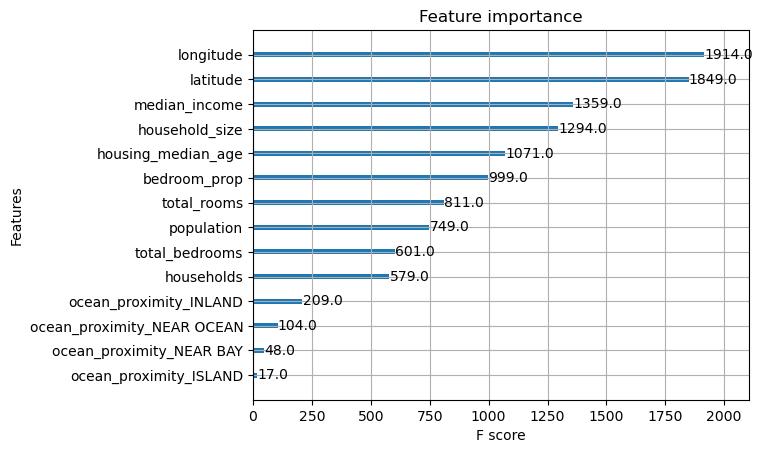

In [131]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Fit the best model on the entire training set
best_xgb_model.fit(X_train, y_train)

# Plot feature importance
plot_importance(best_xgb_model)
plt.show()

# 4. Insights and key findings


### Lasso Regression:
> Best Model Score: 70925.63

> Best Hyperparameters: {'lasso__alpha': 100.0, 'scaler': MinMaxScaler()}

>The Lasso regression model, with a regularization strength (alpha) of 100.0, achieved a score of 70925.63.

>MinMaxScaler was applied to scale the features.

### Ridge Regression:
> Best Model Score: 71003.22

> Best Hyperparameters: {'ridge__alpha': 0.1, 'scaler': MinMaxScaler()}

> The Ridge regression model, with a regularization strength (alpha) of 0.1, achieved a score of 71003.22.

> MinMaxScaler was applied to scale the features.

### Elastic Net Regression:
> Best Model Score: 70913.52

> Best Hyperparameters: {'elastic_net__alpha': 0.01, 'elastic_net__l1_ratio': 0.7, 'scaler': StandardScaler()}

> The Elastic Net regression model, with an alpha of 0.01, l1_ratio of 0.7, achieved a score of 70913.52.

> StandardScaler was applied to scale the features.

### XGBoost Regressor:
> Best Model Score: 46926.22

> Best Hyperparameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 400, 'subsample': 0.9}

> The XGBoost Regressor, with hyperparameters colsample_bytree=0.9, learning_rate=0.1, max_depth=5, n_estimators=400, subsample=0.9, achieved a score of 46926.22.

> No specific scaler was mentioned; XGBoost models often don't require feature scaling.

# 5. Next Steps


### Categorical Variables:

> The 'ocean_proximity' column was one-hot encoded. Verify the impact of this transformation on model performance and assess if alternative encoding methods may be beneficial.

### Further Hyperparameter Tuning:

> Experiment with additional hyperparameter tuning to optimize the models further. 

> Consider a broader search space for hyperparameters.

### Deep learning techniques can be explored
> CNN and RNN could be used to achieve better scores

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
